In [33]:
# %pip install llama-index-llms-azure-openai
# %pip install llama-index-graph-stores-nebula
# %pip install llama-index-llms-openai
# %pip install llama-index-embeddings-azure-openai


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [34]:
# !pip install llama-index transformers pyvis networkx

In [35]:
from transformers import pipeline

triplet_extractor = pipeline('text2text-generation', model='Babelscape/rebel-large', tokenizer='Babelscape/rebel-large')
# , device='cuda:0'

In [36]:
# Function to parse the generated text and extract the triplets
# Rebel outputs a specific format. This code is mostly copied from the model card!

def extract_triplets(input_text):
    text = triplet_extractor.tokenizer.batch_decode([triplet_extractor(input_text, return_tensors=True, return_text=False)[0]["generated_token_ids"]])[0]

    triplets = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    for token in text.replace("<s>", "").replace("<pad>", "").replace("</s>", "").split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and subject in input_text and relation != '' and relation in input_text and object_ != '' and object_ in input_text:
        triplets.append((subject.strip(), relation.strip(), object_.strip()))

    return triplets

In [12]:
import openai
import os

# Uses openai to generate natural language responses over the paul graham esay
os.environ["OPENAI_API_KEY"] = "sk-None-Y8DoDJRGH63XFz1edTyaT3BlbkFJMtiwHXQBmx5addWF1b57"
openai.api_key = os.environ["OPENAI_API_KEY"]

In [38]:
from llama_index.core import SimpleDirectoryReader, ServiceContext, VectorStoreIndex


documents = SimpleDirectoryReader(input_files=["./paul_graham_essay.txt"]).load_data()

In [39]:
documents[0]

Document(id_='d646b309-99d0-421c-bb3f-acad04ed1e40', embedding=None, metadata={'file_path': 'paul_graham_essay.txt', 'file_name': 'paul_graham_essay.txt', 'file_type': 'text/plain', 'file_size': 75040, 'creation_date': '2024-09-30', 'last_modified_date': '2024-03-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='What I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. I didn\'t write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.\n\nThe first programs I tried writing were on the IBM 1401 that our s

In [40]:
# !pip install -q llama-index

In [41]:
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

Settings.llm = OpenAI(model="gpt-3.5-turbo")
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-small")
Settings.node_parser = SentenceSplitter(chunk_size=256, chunk_overlap=10)
Settings.num_output = 256
Settings.context_window = 3900

In [42]:
# a document summary index needs both an llm and embed model
# for the constructor
index = DocumentSummaryIndex.from_documents(
    documents, embed_model=embed_model, llm=llm
)

NameError: name 'DocumentSummaryIndex' is not defined

In [44]:
from llama_index.llms.openai import OpenAI

# rebel supports up to 512 input tokens, but shorter sequences also work well
service_context = ServiceContext.from_defaults(llm=OpenAI(model_name="gpt-3.5-turbo"), chunk_size=256)

index = KnowledgeGraphIndex.from_documents(documents, kg_triplet_extract_fn=extract_triplets, service_context=service_context)

ValueError: ServiceContext is deprecated. Use llama_index.settings.Settings instead, or pass in modules to local functions/methods/interfaces.
See the docs for updated usage/migration: 
https://docs.llamaindex.ai/en/stable/module_guides/supporting_modules/service_context_migration/

In [ ]:
response = index.as_query_engine().query("What happened to the author at Interleaf?")
print(response)

main

In [4]:
from llama_index.core import SimpleDirectoryReader

reader = SimpleDirectoryReader(input_dir= r"C:\Users\My_Pc\Desktop\Thư Viện Pháp Luật final\Tool TVPL AI\Graph_rag\cong_thuc_tinh_thue")
documents = reader.load_data(num_workers=4)

In [5]:
documents

[Document(id_='b1461e2a-7a48-4471-855c-07b27c83f7f9', embedding=None, metadata={'page_label': '1', 'file_name': 'CÔNG THỨC TÍNH THUẾ THU NHẬP CÁ NHÂN MỚI NHẤT.pdf', 'file_path': 'C:\\Users\\My_Pc\\Desktop\\Thư Viện Pháp Luật final\\Tool TVPL AI\\Graph_rag\\cong_thuc_tinh_thue\\CÔNG THỨC TÍNH THUẾ THU NHẬP CÁ NHÂN MỚI NHẤT.pdf', 'file_type': 'application/pdf', 'file_size': 194162, 'creation_date': '2024-10-01', 'last_modified_date': '2024-09-25'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='CÔNG TH ỨC TÍNH THU Ế THU NH ẬP CÁ NHÂN  MỚI NH ẤT \n1. Mức thu ế suất thu ế thu nh ập cá nhân  \nViệc xác nh ận mức đóng thu ế thu nh ập cá nhân đư ợc chia làm 2 d ạng là  biểu thu ế \nlũy ti ến từng ph ần và bi ểu thu ế toàn ph ần. \nBiểu thu ế lũy t ừng ph ần là

test

In [17]:
# For OpenAI

import os

os.environ["OPENAI_API_KEY"] = "sk-None-Y8DoDJRGH63XFz1edTyaT3BlbkFJMtiwHXQBmx5addWF1b57"

import logging
import sys

logging.basicConfig(
    stream=sys.stdout, level=logging.INFO
)  # logging.DEBUG for more verbose output


# define LLM
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

Settings.llm = OpenAI(temperature=0, model="gpt-3.5-turbo")
Settings.chunk_size = 512

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. Its headquarters are located in Cupertino, California."

# Phân tích văn bản
doc = nlp(text)

# Trích xuất thực thể và quan hệ
for sent in doc.sents:
    for token in sent:
        # Tìm chủ ngữ (nsubj) và động từ chính (ROOT)
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            subject = token.text
            predicate = token.head.text

            # Tìm bổ ngữ (attr) hoặc cụm giới từ (prep + pobj)
            objects = []
            for child in token.head.children:
                if child.dep_ == "prep":
                    for pobj in child.children:
                        if pobj.dep_ == "pobj":
                            objects.append(f"{child.text} {pobj.text}")
                elif child.dep_ == "attr":
                    objects.append(child.text)

            if objects:
                print(f"{subject} - {predicate} - {', '.join(objects)}")

        # Xử lý các cụm thời gian
        elif token.dep_ == "prep" and token.text == "in":
            subject = token.head.text
            predicate = f"{token.head.text} {token.text}"
            obj = [child.text for child in token.children if child.dep_ == "pobj"]
            if obj:
                print(f"{subject} - {predicate} - {obj[0]}")


founded - founded in - 1976
located - located in - Cupertino


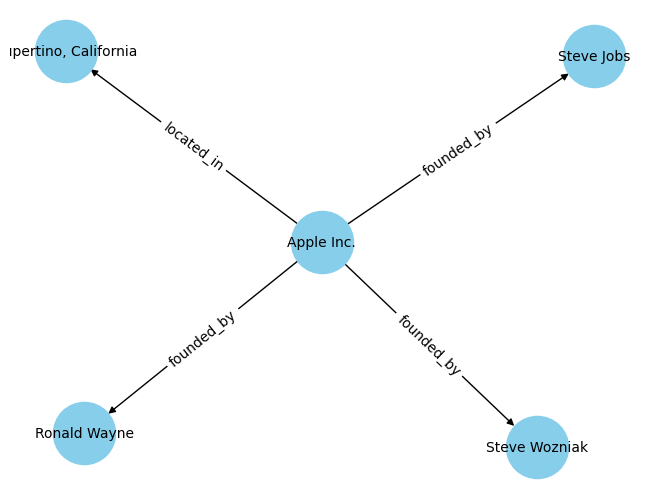

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Ví dụ triple
triples = [
    ("Apple Inc.", "founded_by", "Steve Jobs"),
    ("Apple Inc.", "founded_by", "Steve Wozniak"),
    ("Apple Inc.", "founded_by", "Ronald Wayne"),
    ("Apple Inc.", "located_in", "Cupertino, California")
]

# Tạo đồ thị
G = nx.DiGraph()

# Thêm các cạnh (subject - predicate - object)
for s, p, o in triples:
    G.add_edge(s, o, label=p)

# Vẽ đồ thị
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [21]:
from py2neo import Graph, Node, Relationship

# Kết nối đến cơ sở dữ liệu Neo4j (sử dụng username và password của bạn)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "minhminh"))

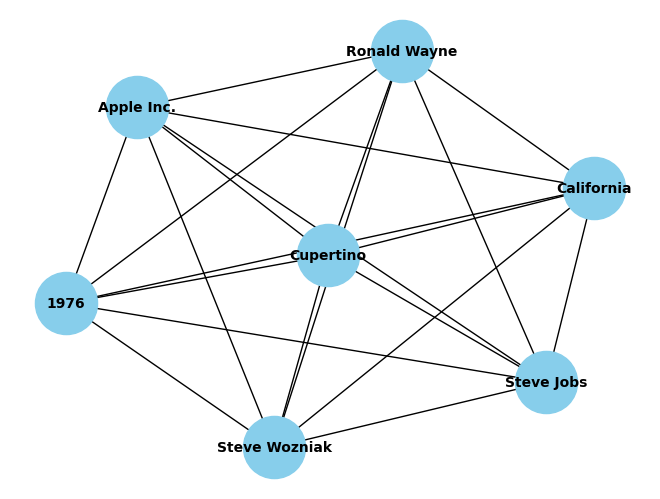

In [30]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Tải mô hình ngôn ngữ
nlp = spacy.load("en_core_web_sm")

# Văn bản để phân tích
text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. Its headquarters are located in Cupertino, California."
doc = nlp(text)

# Lấy tất cả thực thể
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Tạo đồ thị
G = nx.Graph()

# Thêm các thực thể vào đồ thị
for entity in entities:
    G.add_node(entity[0], label=entity[1])

# Thêm các cạnh dựa trên mối quan hệ giữa các thực thể
for ent1 in entities:
    for ent2 in entities:
        if ent1 != ent2:
            # Tạo một cạnh giữa các thực thể nếu chúng nằm trong cùng một câu
            if ent1[0] in doc.text and ent2[0] in doc.text:
                G.add_edge(ent1[0], ent2[0])

# Vẽ đồ thị
pos = nx.spring_layout(G)  # Tính toán vị trí của các nút
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
plt.show()


In [29]:
import spacy
from neo4j import GraphDatabase

# Tải mô hình ngôn ngữ
nlp = spacy.load("en_core_web_sm")

# Văn bản để phân tích
text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. Its headquarters are located in Cupertino, California."
doc = nlp(text)

# Lấy tất cả thực thể
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Thiết lập kết nối với Neo4j
uri = "bolt://localhost:7687"  # Địa chỉ của Neo4j
username = "neo4j"              # Tên người dùng
password = "minhminh"       # Mật khẩu
driver = GraphDatabase.driver(uri, auth=(username, password))

def create_entity(tx, entity_name, entity_type):
    tx.run("MERGE (e:Entity {name: $name, type: $type})", name=entity_name, type=entity_type)

def create_relationship(tx, name1, name2):
    tx.run("MATCH (a:Entity {name: $name1}), (b:Entity {name: $name2}) "
           "MERGE (a)-[:RELATED]->(b)", name1=name1, name2=name2)

# Thêm thực thể vào Neo4j
with driver.session() as session:
    for entity in entities:
        session.execute_write(create_entity, entity[0], entity[1])

    # Thêm mối quan hệ giữa các thực thể
    for i, ent1 in enumerate(entities):
        for j, ent2 in enumerate(entities):
            if i != j:
                session.execute_write(create_relationship, ent1[0], ent2[0])

driver.close()


INFO:neo4j.notifications:Received notification from DBMS server: {severity: INFORMATION} {code: Neo.ClientNotification.Statement.CartesianProduct} {category: PERFORMANCE} {title: This query builds a cartesian product between disconnected patterns.} {description: If a part of a query contains multiple disconnected patterns, this will build a cartesian product between all those parts. This may produce a large amount of data and slow down query processing. While occasionally intended, it may often be possible to reformulate the query that avoids the use of this cross product, perhaps by adding a relationship between the different parts or by using OPTIONAL MATCH (identifier is: (b))} {position: line: 1, column: 1, offset: 0} for query: 'MATCH (a:Entity {name: $name1}), (b:Entity {name: $name2}) MERGE (a)-[:RELATED]->(b)'
INFO:neo4j.notifications:Received notification from DBMS server: {severity: INFORMATION} {code: Neo.ClientNotification.Statement.CartesianProduct} {category: PERFORMANCE}

In [24]:
import spacy
from py2neo import Graph, Node, Relationship

# Kết nối đến cơ sở dữ liệu Neo4j (thay đổi 'your_password' thành mật khẩu của bạn)
graph = Graph("bolt://localhost:7687", auth=("neo4j", "minhminh"))

# Tải mô hình ngôn ngữ
nlp = spacy.load("en_core_web_sm")

# Văn bản để phân tích
text = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976. Its headquarters are located in Cupertino, California."
doc = nlp(text)

# Lấy tất cả thực thể
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Tạo Nodes trong Neo4j cho tất cả các thực thể
for entity_text, entity_label in entities:
    # Tạo hoặc lấy node của thực thể
    entity_node = Node(entity_label, name=entity_text)
    graph.merge(entity_node, entity_label, "name")

# Tạo Relationships
# Giả sử Apple Inc. được thành lập bởi Steve Jobs, Steve Wozniak và Ronald Wayne
apple_node = graph.nodes.match("ORG", name="Apple Inc.").first()

# Tạo mối quan hệ "founded by" giữa Apple Inc. và các nhà sáng lập
founders = ["Steve Jobs", "Steve Wozniak", "Ronald Wayne"]
for founder in founders:
    founder_node = graph.nodes.match("PERSON", name=founder).first()
    if founder_node:
        rel = Relationship(apple_node, "FOUNDED_BY", founder_node)
        graph.create(rel)

# Tạo mối quan hệ "located in" cho "headquarters"
headquarters_node = Node("Location", name="headquarters")
graph.merge(headquarters_node, "Location", "name")

# Tạo mối quan hệ "located in" giữa headquarters và Cupertino
cupertino_node = graph.nodes.match("GPE", name="Cupertino").first()
if cupertino_node:
    rel_located = Relationship(headquarters_node, "LOCATED_IN", cupertino_node)
    graph.create(rel_located)

# Hoàn tất
print("Đã tạo graph knowledge trong Neo4j!")


Đã tạo graph knowledge trong Neo4j!


In [31]:
from llama_index.core import SimpleDirectoryReader, KnowledgeGraphIndex
from llama_index.core.graph_stores import SimpleGraphStore

from llama_index.llms.openai import OpenAI
from llama_index.core import Settings
from IPython.display import Markdown, display

In [32]:
# My OpenAI Key
import os

os.environ["OPENAI_API_KEY"] = "sk-a0khYUHBaQOMhZkcr5pNgNEcl6i9-4cmpmjKxIShyLT3BlbkFJxt6vnTi02sQ7JSk_39KIv9j4JoRS8tCO3mZ-3V8cQA"

In [33]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [34]:
documents = SimpleDirectoryReader(
    "cong_thuc_tinh_thue"
).load_data()

In [35]:
documents

[Document(id_='c047b755-583d-41fd-b42d-fefd0004f509', embedding=None, metadata={'page_label': '1', 'file_name': 'CÔNG THỨC TÍNH THUẾ THU NHẬP CÁ NHÂN MỚI NHẤT.pdf', 'file_path': 'c:\\Users\\My_Pc\\Desktop\\Thư Viện Pháp Luật final\\Tool TVPL AI\\Graph_rag\\cong_thuc_tinh_thue\\CÔNG THỨC TÍNH THUẾ THU NHẬP CÁ NHÂN MỚI NHẤT.pdf', 'file_type': 'application/pdf', 'file_size': 194162, 'creation_date': '2024-10-01', 'last_modified_date': '2024-09-25'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='CÔNG TH ỨC TÍNH THU Ế THU NH ẬP CÁ NHÂN  MỚI NH ẤT \n1. Mức thu ế suất thu ế thu nh ập cá nhân  \nViệc xác nh ận mức đóng thu ế thu nh ập cá nhân đư ợc chia làm 2 d ạng là  biểu thu ế \nlũy ti ến từng ph ần và bi ểu thu ế toàn ph ần. \nBiểu thu ế lũy t ừng ph ần là

In [36]:
# define LLM
# NOTE: at the time of demo, text-davinci-002 did not have rate-limit errors

llm = OpenAI(temperature=0, model="gpt-4o-mini")
Settings.llm = llm
Settings.chunk_size = 512

In [37]:
from llama_index.core import StorageContext
import openai
import logging

# Cập nhật API key chính xác từ OpenAI
key_identifier = "TVPL DEV 02"

# Cấu hình logging
logging.basicConfig(level=logging.INFO)
logging.info(f"Using API key identifier: {key_identifier}")

# Thiết lập graph store và storage context
graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)

# Tạo index từ các tài liệu
index = KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    storage_context=storage_context,
)

INFO:root:Using API key identifier: TVPL DEV 02
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.

In [41]:
query_engine = index.as_query_engine(
    include_text=False, response_mode="tree_summarize"
)
response = query_engine.query(
    "Cách tính thuế TNCN đối với cá nhân cư trú",
)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.knowledge_graph.retrievers:> No relationships found, returning nodes found by keywords.
INFO:llama_index.core.indices.knowledge_graph.retrievers:> No nodes found by keywords, returning empty response.
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [43]:
display(Markdown(f"{response}"))

Cách tính thuế thu nhập cá nhân (TNCN) đối với cá nhân cư trú thường bao gồm các bước sau:

1. **Xác định thu nhập chịu thuế**: Tính tổng thu nhập từ các nguồn khác nhau như tiền lương, tiền công, thu nhập từ kinh doanh, cho thuê tài sản, và các khoản thu nhập khác.

2. **Khấu trừ các khoản được phép**: Các khoản khấu trừ bao gồm bảo hiểm xã hội, bảo hiểm y tế, và các khoản giảm trừ gia cảnh cho bản thân và người phụ thuộc.

3. **Tính thu nhập tính thuế**: Sau khi đã khấu trừ các khoản được phép, thu nhập tính thuế sẽ là tổng thu nhập chịu thuế trừ đi các khoản khấu trừ.

4. **Áp dụng biểu thuế**: Sử dụng biểu thuế lũy tiến từng phần để tính thuế TNCN. Mỗi mức thu nhập sẽ có một tỷ lệ thuế khác nhau.

5. **Tính số thuế phải nộp**: Cộng tổng số thuế từ các mức thu nhập để có số thuế TNCN cuối cùng phải nộp.

Cá nhân cư trú cần lưu ý các quy định cụ thể và mức thuế suất có thể thay đổi theo từng năm.

In [76]:
query_engine = index.as_query_engine(
    include_text=True, response_mode="tree_summarize"
)
response = query_engine.query(
    "thu nhập 80 triệu thuế suất bao nhiêu",
)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.knowledge_graph.retrievers:> No relationships found, returning nodes found by keywords.
INFO:llama_index.core.indices.knowledge_graph.retrievers:> No nodes found by keywords, returning empty response.
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [77]:
display(Markdown(f"{response}"))

Để xác định thuế suất cho thu nhập 80 triệu, cần biết quy định cụ thể về thuế thu nhập cá nhân tại địa phương hoặc quốc gia áp dụng. Thông thường, thuế suất có thể thay đổi tùy theo mức thu nhập và các yếu tố khác như tình trạng hôn nhân, số người phụ thuộc, và các khoản giảm trừ. Bạn nên tham khảo thông tin từ cơ quan thuế hoặc chuyên gia tài chính để có con số chính xác.

In [46]:
# NOTE: can take a while!
new_index = KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    include_embeddings=True,
)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST

In [47]:
new_index

In [101]:
# query using top 3 triplets plus keywords (duplicate triplets are removed)
query_engine = index.as_query_engine(
    include_text=True,
    response_mode="tree_summarize",
    embedding_mode="hybrid",
    similarity_top_k=10,
)
response = query_engine.query(
    "thuế tncn được chia làm mấy dạng",
)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.knowledge_graph.retrievers:> No relationships found, returning nodes found by keywords.
INFO:llama_index.core.indices.knowledge_graph.retrievers:> No nodes found by keywords, returning empty response.
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [103]:
display(Markdown(f"{response}"))

Thuế thu nhập cá nhân (TNCN) thường được chia thành hai dạng chính: thuế TNCN từ tiền lương, tiền công và thuế TNCN từ hoạt động kinh doanh.

In [50]:
## create graph
from pyvis.network import Network

g = index.get_networkx_graph()
net = Network(notebook=True, cdn_resources="in_line", directed=True)
net.from_nx(g)
net.show("example.html")

example.html


In [55]:
from llama_index.core.node_parser import SentenceSplitter

In [56]:
node_parser = SentenceSplitter()

In [57]:
nodes = node_parser.get_nodes_from_documents(documents)

In [58]:
# initialize an empty index for now
index = KnowledgeGraphIndex(
    [],
)

C:\Users\My_Pc\AppData\Local\Temp\ipykernel_9644\711058244.py:2: DeprecationWarning: Call to deprecated class KnowledgeGraphIndex. (The KnowledgeGraphIndex class has been deprecated. Please use the new PropertyGraphIndex class instead. If a certain graph store integration is missing in the new class, please open an issue on the GitHub repository or contribute it!) -- Deprecated since version 0.10.53.
  index = KnowledgeGraphIndex(


In [59]:
# add keyword mappings and nodes manually
# add triplets (subject, relationship, object)

# for node 0
node_0_tups = [
    ("author", "worked on", "writing"),
    ("author", "worked on", "programming"),
]
for tup in node_0_tups:
    index.upsert_triplet_and_node(tup, nodes[0])

# for node 1
node_1_tups = [
    ("Interleaf", "made software for", "creating documents"),
    ("Interleaf", "added", "scripting language"),
    ("software", "generate", "web sites"),
]
for tup in node_1_tups:
    index.upsert_triplet_and_node(tup, nodes[1])

In [60]:
query_engine = index.as_query_engine(
    include_text=False, response_mode="tree_summarize"
)
response = query_engine.query(
    "Tell me more about Interleaf",
)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [61]:
str(response)

'Interleaf is associated with the development of software designed for creating documents. Additionally, it has incorporated a scripting language into its offerings. The software produced by Interleaf is capable of generating web sites.'

# 3/10/2024

In [35]:
# For OpenAI

import os
import openai

openai.api_key  = "sk-a0khYUHBaQOMhZkcr5pNgNEcl6i9-4cmpmjKxIShyLT3BlbkFJxt6vnTi02sQ7JSk_39KIv9j4JoRS8tCO3mZ-3V8cQA"
import logging
import sys

logging.basicConfig(
    stream=sys.stdout, level=logging.INFO
)  # logging.DEBUG for more verbose output


# define LLM
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

Settings.llm = OpenAI(temperature=0, model="gpt-3.5-turbo")
Settings.chunk_size = 512

In [36]:
from llama_index.core import KnowledgeGraphIndex, SimpleDirectoryReader
from llama_index.core import StorageContext
from llama_index.graph_stores.nebula import NebulaGraphStore


from llama_index.llms.openai import OpenAI
from IPython.display import Markdown, display

In [37]:
documents = SimpleDirectoryReader(
    "cong_thuc_tinh_thue"
).load_data()

In [38]:
# Create a NebulaGraph (version 3.5.0 or newer) cluster with:
# Option 0 for machines with Docker: `curl -fsSL nebula-up.siwei.io/install.sh | bash`
# Option 1 for Desktop: NebulaGraph Docker Extension https://hub.docker.com/extensions/weygu/nebulagraph-dd-ext

# If not, create it with the following commands from NebulaGraph's console:
# CREATE SPACE llamaindex(vid_type=FIXED_STRING(256), partition_num=1, replica_factor=1);
# :sleep 10;
# USE llamaindex;
# CREATE TAG entity(name string);
# CREATE EDGE relationship(relationship string);
# :sleep 10;
# CREATE TAG INDEX entity_index ON entity(name(256));

# %pip install ipython-ngql nebula3-python

os.environ["NEBULA_USER"] = "root"
os.environ["NEBULA_PASSWORD"] = "nebula"  # default is "nebula"
os.environ[
    "NEBULA_ADDRESS"
] = "127.0.0.1:9669"  # assumed we have NebulaGraph installed locally

space_name = "quocminhdb"
edge_types, rel_prop_names = ["relationship"], [
    "relationship"
]  # default, could be omit if create from an empty kg
tags = ["entity"]  # default, could be omit if create from an empty kg

In [43]:
graph_store = NebulaGraphStore(
    space_name=space_name,
    edge_types=edge_types,
    rel_prop_names=rel_prop_names,
    tags=tags,
)

storage_context = StorageContext.from_defaults(graph_store=graph_store)

# NOTE: can take a while!
index = KnowledgeGraphIndex.from_documents(
    documents,
    storage_context=storage_context,
    max_triplets_per_chunk=2,
    space_name=space_name,
    edge_types=edge_types,
    rel_prop_names=rel_prop_names,
    tags=tags,
)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
ERROR:llama_index.graph_stores.nebula.nebula_graph_store:Query failed. Query: INSERT VERTEX `entity`(name)   VALUES "Đóng":("Đóng");INSERT VERTEX `entity`(name)   VALUES "Mức thuế":("Mức thuế");INSERT EDGE `relationship`(`relationship`)   VALUES "Đóng"->"Mức thuế"@4561709382266054383:("Là");, Param: {}Error message: Query failed. Query: INSERT VERTEX `entity`(name)   VALUES "Đóng":("Đóng");INSERT VERTEX `entity`(name)   VALUES "Mức thuế":("Mức thuế");INSERT EDGE `relationship`(`relationship`)   VALUES "Đóng"->"Mức thuế"@4561709382266054383:("Là");, Param: {}Error message: SemanticError: No schema found for `entity'
ERROR:llama_index.graph_stores.nebula.nebula_graph_store:Query failed. Query: INSERT VERTEX `entity`(name)   VALUES "Đóng":("Đóng");INSERT VERTEX `entity`(name)   VALUES "Mức thuế":("Mức thuế");INSERT EDGE `relationship`(`relationship`)   VALUES "Đóng"->"Mức thuế"@4561709382266054383:(

RetryError: RetryError[<Future at 0x26de5d9c2c0 state=finished raised ValueError>]

In [40]:
try:
    # Khởi tạo NebulaGraphStore
    graph_store = NebulaGraphStore(
        space_name=space_name,
        edge_types=edge_types,
        rel_prop_names=rel_prop_names,
        tags=tags,
    )

    # Tạo StorageContext
    storage_context = StorageContext.from_defaults(graph_store=graph_store)

    # Tạo KnowledgeGraphIndex
    index = KnowledgeGraphIndex.from_documents(
        documents,
        storage_context=storage_context,
        max_triplets_per_chunk=2,
        space_name=space_name,
        edge_types=edge_types,
        rel_prop_names=rel_prop_names,
        tags=tags,
    )
except ValueError as e:
    print(f"Error occurred: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
ERROR:llama_index.graph_stores.nebula.nebula_graph_store:Query failed. Query: INSERT VERTEX `entity`(name)   VALUES "Công thức tính thuế thu nhập cá nhân mới nhất":("Công thức tính thuế thu nhập cá nhân mới nhất");INSERT VERTEX `entity`(name)   VALUES "2 dạng":("2 dạng");INSERT EDGE `relationship`(`relationship`)   VALUES "Công thức tính thuế thu nhập cá nhân mới nhất"->"2 dạng"@-5972627616142409563:("Chia làm");, Param: {}Error message: Query failed. Query: INSERT VERTEX `entity`(name)   VALUES "Công thức tính thuế thu nhập cá nhân mới nhất":("Công thức tính thuế thu nhập cá nhân mới nhất");INSERT VERTEX `entity`(name)   VALUES "2 dạng":("2 dạng");INSERT EDGE `relationship`(`relationship`)   VALUES "Công thức tính thuế thu nhập cá nhân mới nhất"->"2 dạng"@-5972627616142409563:("Chia làm");, Param: {}Error message: SemanticError: No schema found for `entity'
ERROR:llama_index.graph_stores.nebula.